In [1]:
!pip install keras

     |████████████████████████████████| 378kB 3.9MB/s eta 0:00:01
     |████████████████████████████████| 266kB 58.6MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp36-cp36m-linux_x86_64.whl size=44105 sha256=543055f9ffc247261541b6948bda6145434f3dd2d9dd2ca7ffd7f949a372c98f
  Stored in directory: /root/.cache/pip/wheels/d9/45/dd/65f0b38450c47cf7e5312883deb97d065e030c5cca0a365030
Successfully built pyyaml
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 40s 3us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.2718 - accuracy: 0.9158 - val_loss: 0.0651 - val_accuracy: 0.9798
Epoch 2/12
12544/60000 [=====>........................] - ETA: 1:59 - loss: 0.1036 - accuracy: 0.9702

In [3]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [1]:
# load and evaluate a saved model
#from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('../Models/model.h5')
# summarize model.
model.summary()
# load datasetdataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables = dataset[:,0:8] = dataset[:,8]
# evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Using TensorFlow backend.




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)            

NameError: name 'x_test' is not defined

In [3]:
from matplotlib import pyplot as plt

In [7]:
x_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

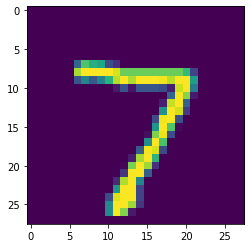

In [10]:
import numpy as np
img = np.reshape(x_test[0], (28,28))
x_test[0].shape
plt.imshow(img)
plt.show()

In [17]:
img1 = np.reshape(x_test[1], (1,28,28,1))
pred = model.predict(img1)
print(pred)

[[6.0841323e-09 7.5874866e-08 9.9999988e-01 4.3297956e-12 9.9889437e-12
  6.7921017e-14 2.2286424e-09 7.2162667e-14 5.1804092e-11 2.9550190e-12]]


In [18]:
result = np.argmax(pred)
print(result)

2


In [23]:
!pip install pillow

     |████████████████████████████████| 2.1MB 3.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
ejemplo = plt.imread('../Image/example.png')

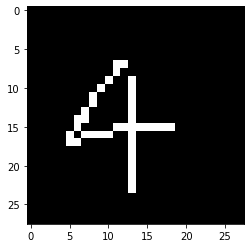

(28, 28, 4)


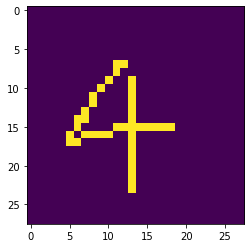

In [35]:
plt.imshow(ejemplo)
plt.show()
print(ejemplo.shape)
grises = ejemplo[:,:,0]
plt.imshow(grises)
plt.show()

In [36]:
img2 = np.reshape(grises, (1,28,28,1))
pred1 = model.predict(img2)
print(pred)
result1 = np.argmax(pred)
print(result)

[[3.6945958e-14 2.5104370e-12 8.0871819e-14 4.5450119e-10 1.6003792e-06
  7.8187048e-09 4.3771098e-14 7.0857755e-07 3.8935266e-07 9.9999738e-01]]
9


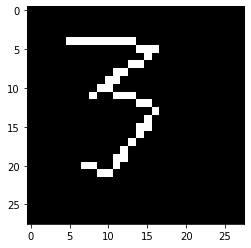

(28, 28, 4)


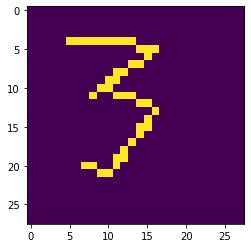

In [6]:
tres = plt.imread('../Image/tres.png')
plt.imshow(tres)
plt.show()
print(tres.shape)
gris = tres[:,:,0]
plt.imshow(gris)
plt.show()

In [43]:
img3 = np.reshape(gris, (1,28,28,1))
pred2 = model.predict(img3)
print(pred2)
result2 = np.argmax(pred2)
print(result2)

[[5.9475387e-05 5.7278858e-03 5.0841771e-02 8.5487318e-01 4.5405253e-05
  9.0140747e-03 1.0062194e-05 2.6323623e-03 6.6389207e-04 7.6131888e-02]]
3


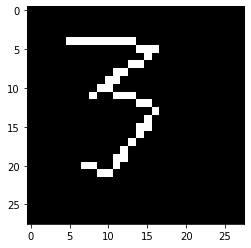

(28, 28, 4)


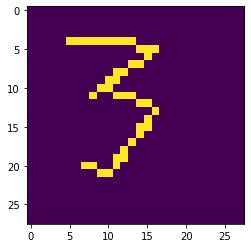

[[5.9475442e-05 5.7278802e-03 5.0841685e-02 8.5487318e-01 4.5405301e-05
  9.0140654e-03 1.0062185e-05 2.6323635e-03 6.6389085e-04 7.6131932e-02]]
3


In [7]:
from keras.models import load_model
import numpy as np
from matplotlib import pyplot as plt

# load model
model = load_model('../Models/model.h5')

imagen = plt.imread('../Image/tres.png')
plt.imshow(imagen)
plt.show()
print(imagen.shape)
escala_grises = imagen[:,:,0]
plt.imshow(escala_grises)
plt.show()
rezise = np.reshape(escala_grises, (1,28,28,1))
predic = model.predict(rezise)
print(predic)
resultado = np.argmax(predic)
print(resultado)